In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
df = pd.read_csv(r"C:\Users\pauli\Downloads\TubPacientoZalingasIprotis.csv", low_memory=False)

In [29]:
df.drop(columns=['_type', '_id', '_revision', '_page.next', 'paciento_id', 'paciento_vardas',
                       'paciento_pavarde', 'paciento_gim_data', 'paciento_asmens_kodas', 'vda_ak_validacija', 'vda_paciento_gim_metai_ak',  
                       'vda_paciento_lytis_ak', 'vda_ligos_kodai', 'ligos_kodas'], inplace= True)

In [30]:
df1 = df[df['paciento_gim_metai'].notna()]

In [31]:
df1.loc[:, 'paciento_gim_metai'] = df1['paciento_gim_metai'].apply(lambda x: int(str(x).split('-')[0]))
df1.loc[:, 'mirties_nuo_tub_d'] = df1['mirties_nuo_tub_d'].apply(lambda x: int(str(x).split('-')[0]) if pd.notna(x) else x)


In [32]:
df1 = df1[df1['mirties_nuo_tub_d'].notna()]

In [33]:
df1['gyvenimo_trukme']=df1['mirties_nuo_tub_d'] - df1['paciento_gim_metai']

In [34]:
df1.head()

,paciento_gim_metai,paciento_lytis,rukymas_id,rukymas_reiksme,rukymo_stazas_id,rukymo_stazas_reiksme,alkoholis_id,alkoholis_reiksme,ar_mire_nuo_tub,mirties_nuo_tub_d,gyvenimo_trukme
5,1924,V,4.0,Nerūko,NaN,NaN,2.0,Vartoja retai,True,2003.0,79.0
7,1951,V,2.0,11-20 cigarečių per dieną,4.0,Virš 20 metų,3.0,Girtauja,False,2007.0,56.0
11,1985,V,2.0,11-20 cigarečių per dieną,2.0,1 - 10 metų,2.0,Vartoja retai,True,2012.0,27.0
27,1971,V,4.0,Nerūko,0.0,NaN,3.0,Girtauja,True,2007.0,36.0
31,1926,V,2.0,11-20 cigarečių per dieną,4.0,Virš 20 metų,2.0,Vartoja retai,False,1999.0,73.0


In [35]:
df1['gyvenimo_trukme'] = df1['gyvenimo_trukme'].astype(int)

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6428 entries, 5 to 52128
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   paciento_gim_metai     6428 non-null   object 
 1   paciento_lytis         6428 non-null   object 
 2   rukymas_id             6428 non-null   float64
 3   rukymas_reiksme        6411 non-null   object 
 4   rukymo_stazas_id       6346 non-null   float64
 5   rukymo_stazas_reiksme  4552 non-null   object 
 6   alkoholis_id           6428 non-null   float64
 7   alkoholis_reiksme      6410 non-null   object 
 8   ar_mire_nuo_tub        6174 non-null   object 
 9   mirties_nuo_tub_d      6428 non-null   object 
 10  gyvenimo_trukme        6428 non-null   int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 602.6+ KB


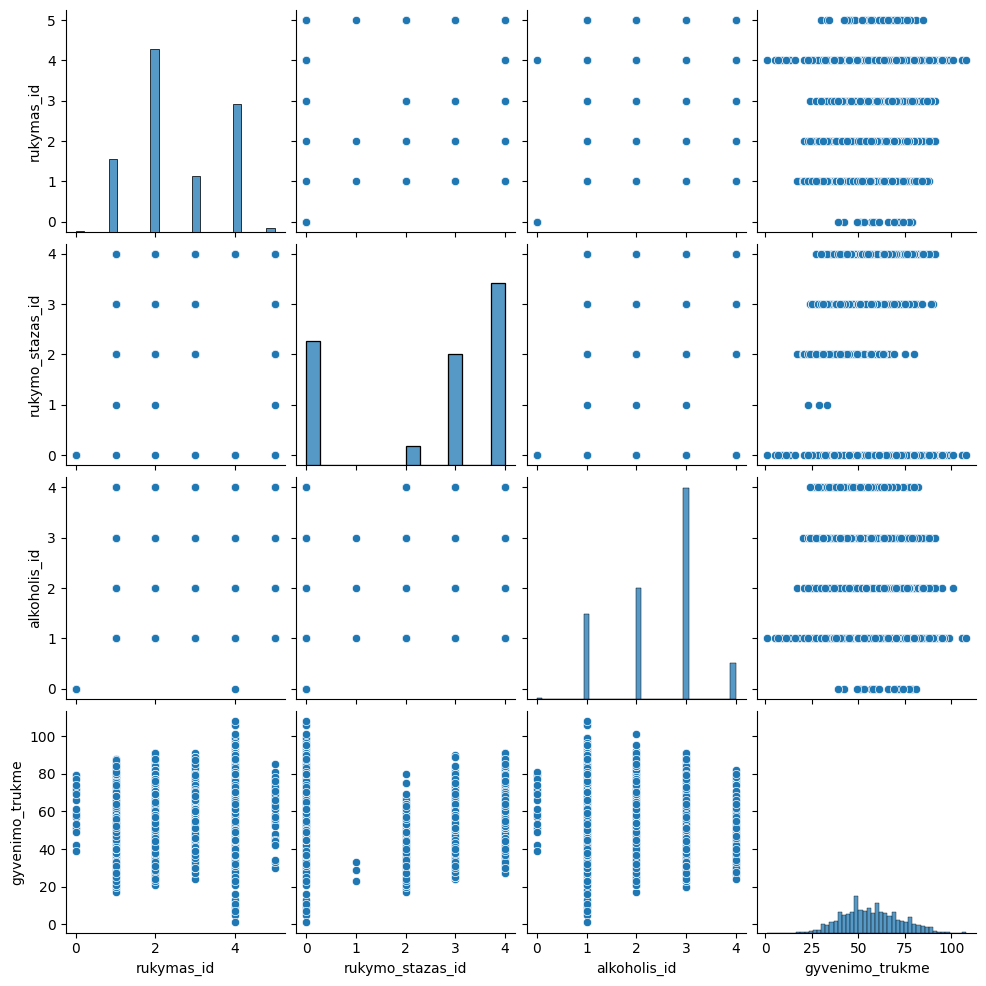

In [37]:
sns.pairplot(df1.select_dtypes(include=['number']))
plt.show()

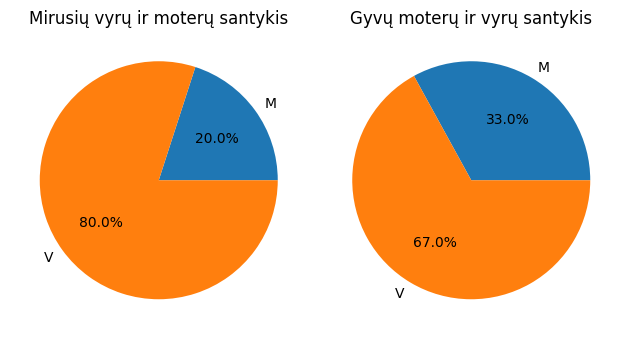

In [38]:
df_lytis_mire = df1.groupby('paciento_lytis').size().reset_index(name='Count')
df2 = df[df['mirties_nuo_tub_d'].isna()]
df_lytis_gyvi = df2.groupby('paciento_lytis').size().reset_index(name='Count')

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(df_lytis_mire['Count'], labels=df_lytis_mire['paciento_lytis'], autopct='%1.1f%%')
ax1.set_title('Mirusių vyrų ir moterų santykis')
ax2.pie(df_lytis_gyvi['Count'], labels=df_lytis_mire['paciento_lytis'], autopct='%1.1f%%')
ax2.set_title('Gyvų moterų ir vyrų santykis')
plt.tight_layout()
plt.show()

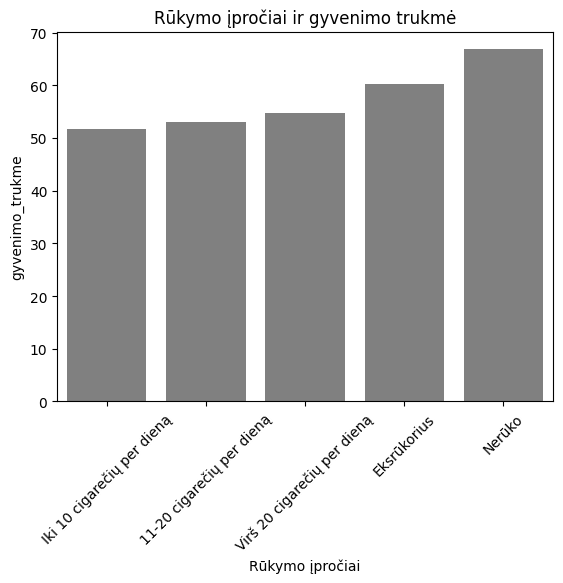

In [39]:
df_rukymas = df1.groupby('rukymas_reiksme')['gyvenimo_trukme'].mean().reset_index().sort_values('gyvenimo_trukme')

sns.barplot(x='rukymas_reiksme', y='gyvenimo_trukme', data=df_rukymas, color='grey')
plt.xlabel('Rūkymo įpročiai')
plt.xticks(rotation=45) 
plt.title('Rūkymo įpročiai ir gyvenimo trukmė')
plt.show()

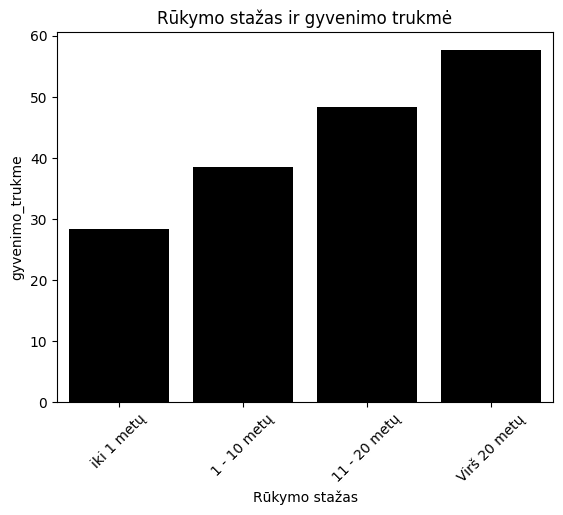

In [40]:
df_rukymo_trukme = df1.groupby('rukymo_stazas_reiksme')['gyvenimo_trukme'].mean().reset_index().sort_values('gyvenimo_trukme')

sns.barplot(x='rukymo_stazas_reiksme', y='gyvenimo_trukme', data=df_rukymo_trukme, color='black')
plt.xlabel('Rūkymo stažas')
plt.xticks(rotation=45) 
plt.title('Rūkymo stažas ir gyvenimo trukmė')
plt.show()

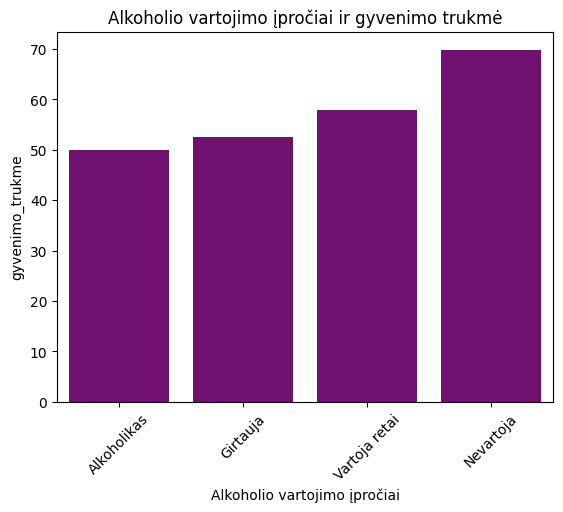

In [41]:
df_alko = df1.groupby('alkoholis_reiksme')['gyvenimo_trukme'].mean().reset_index().sort_values('gyvenimo_trukme')

sns.barplot(x='alkoholis_reiksme', y='gyvenimo_trukme', data=df_alko, color='purple')
plt.xlabel('Alkoholio vartojimo įpročiai')
plt.xticks(rotation=45) 
plt.title('Alkoholio vartojimo įpročiai ir gyvenimo trukmė')
plt.show()

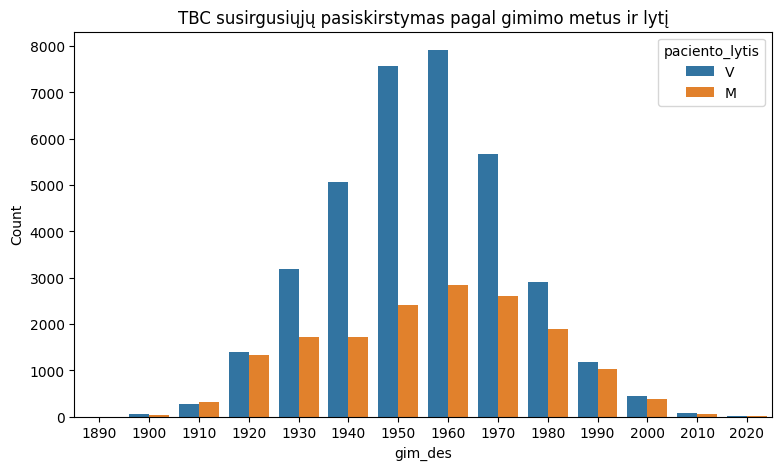

In [42]:
df3=df[df['paciento_gim_metai'].notna()].copy()
df3.loc[:, 'paciento_gim_metai'] = df3['paciento_gim_metai'].apply(lambda x: int(str(x).split('-')[0]))
df3.loc[:, 'gim_des'] = df3['paciento_gim_metai'].apply(lambda x: x//10*10)
df3 = df3.groupby(['gim_des', 'paciento_lytis']).size().reset_index(name='Count')

plt.figure(figsize=(9, 5))
sns.barplot(x='gim_des', y='Count', hue='paciento_lytis', data=df3)

plt.title("TBC susirgusiųjų pasiskirstymas pagal gimimo metus ir lytį")

plt.show()

In [43]:
df4 = df.drop(columns=['mirties_nuo_tub_d', 'alkoholis_reiksme', 'rukymo_stazas_reiksme', 'rukymas_reiksme'])
df4=df4.dropna()
df4.loc[:, 'paciento_gim_metai'] = df4['paciento_gim_metai'].apply(lambda x: int(str(x).split('-')[0]))

df4['paciento_gim_metai']=df4['paciento_gim_metai'].astype(int)
df4['paciento_lytis'] = LabelEncoder().fit_transform(df4['paciento_lytis'])
df4['ar_mire_nuo_tub'] = LabelEncoder().fit_transform(df4['ar_mire_nuo_tub'])

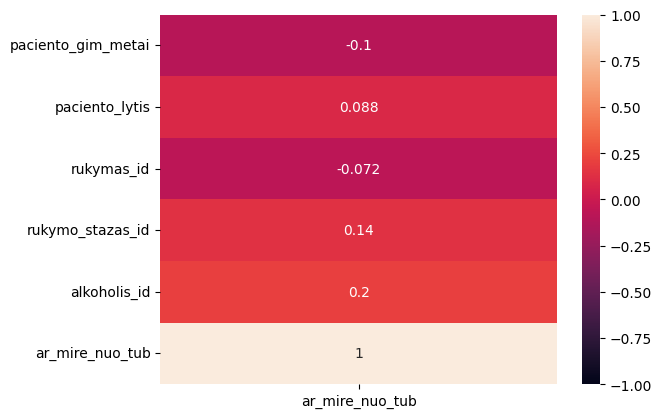

In [44]:
sns.heatmap(data=df4.corr()['ar_mire_nuo_tub'].to_frame(), vmin=-1, vmax=1, annot=True)

plt.show()

In [45]:
x=df4.drop(columns ='ar_mire_nuo_tub')
y= df4['ar_mire_nuo_tub']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

dt_regressor = DecisionTreeClassifier(random_state=5)
dt_regressor.fit(X_train, y_train)
pred = dt_regressor.predict(X_test)
accuracy = dt_regressor.score(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 89.32%


In [46]:
cm = confusion_matrix(y_test, pred)
print(cm)

[[7919   86]
 [ 865   36]]
